<a href="https://colab.research.google.com/github/Sidhi11/PRODIGY_DS_INTERNSHIP-TASK/blob/main/Bank_Task3_prodigy_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset
file_path = '/content/bank.csv'
data = pd.read_csv(file_path,sep=';')

In [1]:
data.head()

NameError: name 'data' is not defined

In [ ]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## **Dataset Cleaning**

In [ ]:
data_cleaned = data.dropna()

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data= data.drop_duplicates()

In [ ]:
data.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [ ]:
data.isna().sum().any()

False

## **Visualization of Dataset**

In [ ]:
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns

In [ ]:
cat_cols,"\n"
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

### Convert categorical variables to numerical values using label encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder
data_viz = data.copy()
label_encoders = {}
for column in data_viz.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_viz[column] = le.fit_transform(data_viz[column])
    label_encoders[column] = le

### Heatmap

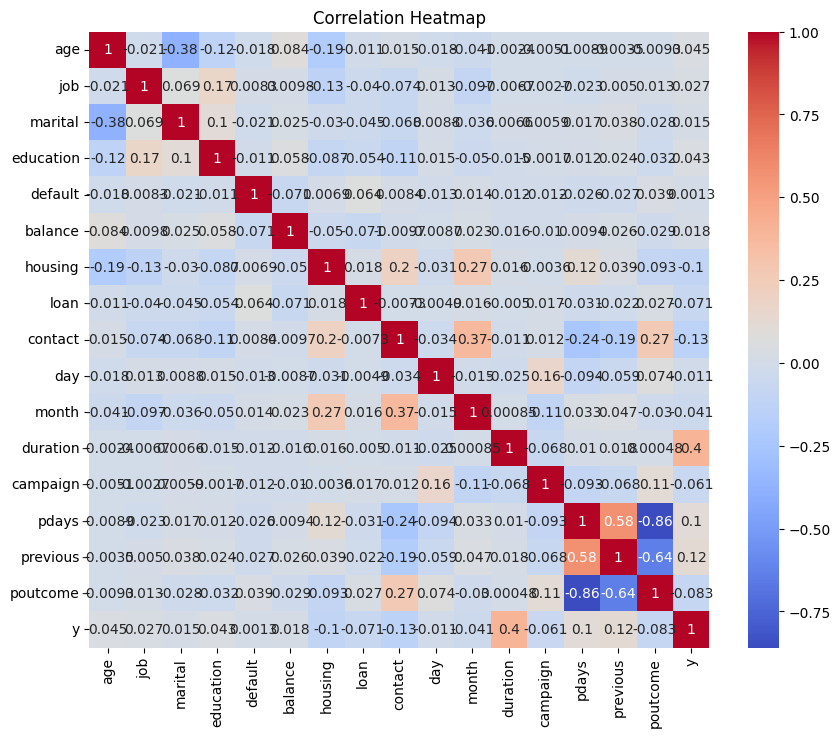

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_viz.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Barplot

In [ ]:
if 'job' in data.columns:
    print(data['job'].unique())

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


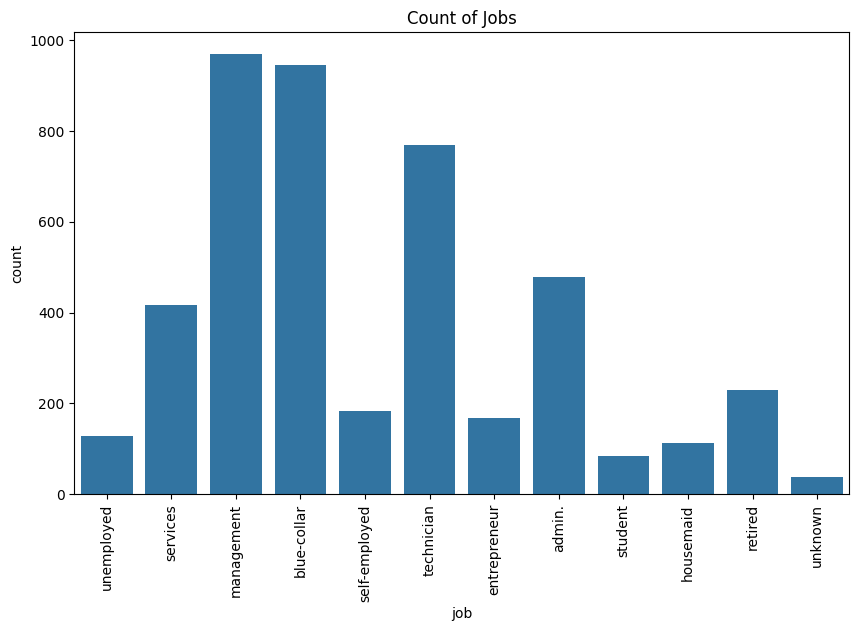

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="job", data=data)
plt.title('Count of Jobs')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data["job"][0]

'unemployed'

### CountPlot

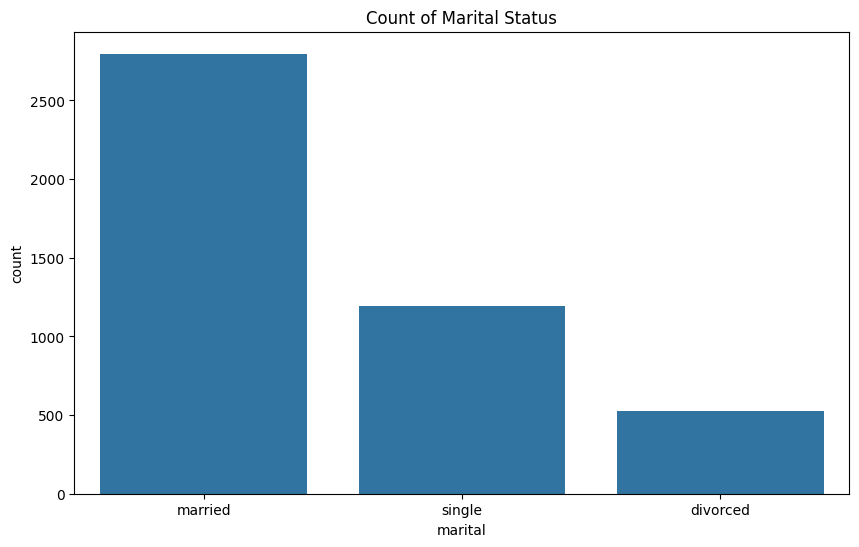

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=data)
plt.title('Count of Marital Status')
plt.show()

### Histogram

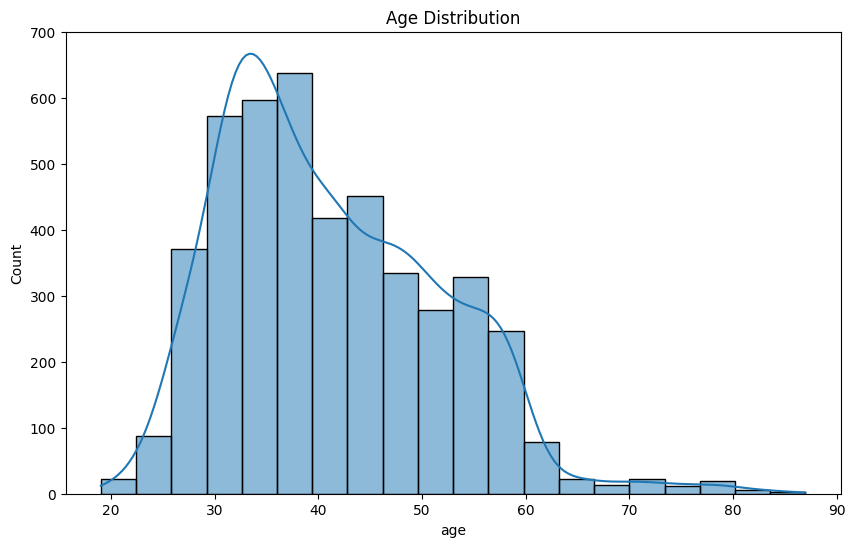

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

## **Create a Decision Tree Classifier Model**

In [ ]:
features = data.drop(columns=['y'])  # Assuming 'y' is the target column
target = data['y']
features = pd.get_dummies(features, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8806629834254144
Confusion Matrix:
[[748  59]
 [ 49  49]]
Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.93      0.93       807
         yes       0.45      0.50      0.48        98

    accuracy                           0.88       905
   macro avg       0.70      0.71      0.70       905
weighted avg       0.89      0.88      0.88       905

